# <center> MATH&ML-9. Математика ансамблевых методов. Часть 1

In [227]:
# Импорты
import sympy
from sympy import Eq, solveset, Symbol, symbols, Interval, S, log, sin, cos, exp, diff, solve, N
from sympy.calculus.util import function_range #импортируем функцию для поиска области значений
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
import matplotlib.pyplot as plt

In [228]:
# Для стартового тестирования
x, y = symbols('x y')
func = x**2 + x*y - y + y**3
exprx = Eq(func.diff(x), 0)
expry = Eq(func.diff(y), 0)

display(exprx)
display(expry)
display(solve([exprx, expry]))

print(func.subs([(x, -1/3), (y, 2/3)]))
print(func.subs([(x, 1/4), (y, -1/2)]))

Eq(2*x + y, 0)

Eq(x + 3*y**2 - 1, 0)

[{x: -1/3, y: 2/3}, {x: 1/4, y: -1/2}]

-0.481481481481482
0.312500000000000


### Юнит 2. Ансамбли моделей. Бутстреппинг. Бэггинг

In [229]:
#Задание 2.2
print(round((4.4**2*1/7 + 3.8**2*1/7 + 4.8**2*1/7 + 4**2*1/7 + 3.4**2*1/7 + 4.2**2*1/7 + 5.2**2*1/7) - ((4.4*1/7 + 3.8*1/7 + 4.8*1/7 + 4*1/7 + 3.4*1/7 + 4.2*1/7 + 5.2*1/7)**2), 3))

# Эталон
a = np.array([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])
b = a.mean()
np.sum((a - b)**2)/7

0.317


0.31673469387755115

In [230]:
# Задание 2.7

data = pd.read_csv('data/wineQualityReds.zip', index_col=[0])
data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [231]:
data['quality'] = data['quality'].apply(lambda x: 0 if x < 6 else 1)

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)
print('f1 на обучающей выборке (логистическая регрессия):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_lr), 3))
print('f1 на тестовой выборке (логистическая регрессия):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_lr), 3))
print('-'*20)

dt_model = tree.DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)
print('f1 на обучающей выборке (дерево решений):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_dt), 3))
print('f1 на тестовой выборке (дерево решений):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_dt), 3))

f1 на обучающей выборке (логистическая регрессия): 0.764
f1 на тестовой выборке (логистическая регрессия): 0.751
--------------------
f1 на обучающей выборке (дерево решений): 0.943
f1 на тестовой выборке (дерево решений): 0.793


c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
#Задание 2.8

bagging_model = ensemble.BaggingClassifier(
    estimator=tree.DecisionTreeClassifier(random_state=42, max_depth=10), 
    n_estimators=1500, 
    random_state=42
    )

bagging_model.fit(X_train, y_train)

y_pred_train_bc = bagging_model.predict(X_train)
y_pred_test_bc = bagging_model.predict(X_test)
print('f1 на обучающей выборке (бэггинг):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_bc), 3))
print('f1 на тестовой выборке (бэггинг):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_bc), 3))

f1 на обучающей выборке (бэггинг): 0.99
f1 на тестовой выборке (бэггинг): 0.818


In [233]:
# from catboost import CatBoostClassifier

# catboost_model = CatBoostClassifier(
#     iterations=500,
#     task_type='GPU',
#     devices='0'
# )
# catboost_model.fit(X_train, y_train)
# y_pred_train_cbc = catboost_model.predict(X_train)
# y_pred_test_cbc = catboost_model.predict(X_test)
# print('f1 на обучающей выборке (бэггинг):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_cbc), 3))
# print('f1 на тестовой выборке (бэггинг):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_cbc), 3))

In [234]:
# Прочитаем данные для практики.
# Дата-сет обрезан
boston_data = pd.read_csv('data/boston__1_.zip')
boston_data

#Дополнительная конвертация признаков во избежание косяков с моделями
columns_to_change = ['crim_rate', 'business', 'zn', 'nit_oxiden', 'rooms', 'age', 'dist', 'pup_per_teaс', 'lower', 'target']
for column in columns_to_change:
    boston_data[column] = boston_data[column].str.replace(',', '.').astype(float)

crim_rate — уровень преступности в районе;

zn — доля участков площадью более 25 000 кв. футов;

business — уровень развитости бизнеса в районе;

river — наличие реки в районе;

nit_oxiden — концентрация оксидов азота в воздухе;

rooms — среднее число комнат в домах района;

age — процент домов, построенных до 1940 года;

dist — расстояние до центров занятости;

highways_index — индекс доступности крупных дорог;

tax — средняя ставка налога на имущество;

pup_per_teac — среднее число учеников на одного учителя;

lower — процент малообеспеченного населения в районе;

target — медианная стоимость домов в районе (целевая переменная).

In [235]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crim_rate       506 non-null    float64
 1   zn              506 non-null    float64
 2   business        506 non-null    float64
 3   river           506 non-null    int64  
 4   nit_oxiden      506 non-null    float64
 5   rooms           506 non-null    float64
 6   age             506 non-null    float64
 7   dist            506 non-null    float64
 8   highways_index  506 non-null    int64  
 9   tax             506 non-null    int64  
 10  pup_per_teaс    506 non-null    float64
 11  lower           506 non-null    float64
 12  target          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [236]:
# Задание 3.4
X = boston_data.drop('target', axis=1)
y = boston_data['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=13)
print('Средняя медианных цен:', round(np.mean(y_train), 2))

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
print('MAE на обучающей выборке (линейная регрессия):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (линейная регрессия):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))
print('-'*20)

dt_model = tree.DecisionTreeRegressor(random_state=13)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)
print('MAE на обучающей выборке (Дерево решений):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (Дерево решений):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))

Средняя медианных цен: 22.77
MAE на обучающей выборке (линейная регрессия): 3.32
MAE на тестовой выборке (линейная регрессия): 3.72
--------------------
MAE на обучающей выборке (Дерево решений): 0.0
MAE на тестовой выборке (Дерево решений): 2.84


In [237]:
# Всё ещё 3.4

rf1 = ensemble.RandomForestRegressor(random_state=13, n_estimators=3)
rf1.fit(X_train, y_train)

y_pred_train = rf1.predict(X_train)
y_pred_test = rf1.predict(X_test)
print('MAE на обучающей выборке (Случайный лес 1):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (Случайный лес 1):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))
print('-'*20)

rf2 = ensemble.RandomForestRegressor(random_state=13, n_estimators=10)
rf2.fit(X_train, y_train)

y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)
print('MAE на обучающей выборке (Случайный лес 2):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (Случайный лес 2):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))
print('-'*20)

rf3 = ensemble.RandomForestRegressor(random_state=13, n_estimators=50)
rf3.fit(X_train, y_train)

y_pred_train = rf3.predict(X_train)
y_pred_test = rf3.predict(X_test)
print('MAE на обучающей выборке (Случайный лес 3):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (Случайный лес 3):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))
print('-'*20)

rf4 = ensemble.RandomForestRegressor(random_state=13, n_estimators=100)
rf4.fit(X_train, y_train)

y_pred_train = rf4.predict(X_train)
y_pred_test = rf4.predict(X_test)
print('MAE на обучающей выборке (Случайный лес 4):', round(metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train), 2))
print('MAE на тестовой выборке (Случайный лес 4):', round(metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 2))
print('-'*20)

MAE на обучающей выборке (Случайный лес 1): 1.02
MAE на тестовой выборке (Случайный лес 1): 2.93
--------------------
MAE на обучающей выборке (Случайный лес 2): 0.98
MAE на тестовой выборке (Случайный лес 2): 2.47
--------------------
MAE на обучающей выборке (Случайный лес 3): 0.89
MAE на тестовой выборке (Случайный лес 3): 2.25
--------------------
MAE на обучающей выборке (Случайный лес 4): 0.87
MAE на тестовой выборке (Случайный лес 4): 2.26
--------------------


### Юнит 4. Случайный лес. Практика

In [238]:
weather_data = pd.read_csv('data/weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [239]:
display(weather_data.info())
display(weather_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

None

(145460, 23)

Date — дата, в которую зафиксировано наблюдение;

Location — местонахождение метеорологической станции;

MinTemp — минимальная температура (℃);

MaxTemp — максимальная температура (℃);

Rainfall — количество осадков (дождь) за сутки (мм);

Evaporation — количество испарений до 9 утра (мм);

Sunshine — количество часов в сутках, когда светило солнце;

WindGustDir — направление самого сильного порыва ветра за последние 24 часа;

WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;

WindDir9am — направление ветра в 9 утра;

WindDir3pm — направление ветра в 3 часа дня;

WindSpeed9am — скорость ветра в 9 часов утра;

WindSpeed3pm — скорость ветра в 3 часа дня;

Humidity9am — влажность в 9 утра;

Humidity3pm — влажность в 3 часа дня;

Pressure9am — атмосферное давление в 9 утра;

Pressure3pm — атмосферное давление в 3 часа дня;

Cloud9am — часть неба, закрытая облаками, в 9 утра;

Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;

Temp9am — температура в 9 утра;

Temp3pm — температура в 3 часа дня;

RainToday — наличие дождя в этот день;

RainTomorrow — наличие дождя на следующий день.

In [240]:
#Задание 4.1
print(f'В данных всего {weather_data.isna().sum().sum()} пропусков.')

В данных всего 343248 пропусков.


In [241]:
#Задание 4.2
display(weather_data.isna().mean()*100)
#Удаляем все признаки, в которых более 40% пропусков
weather_data = weather_data.drop(['Evaporation', 'Sunshine', 'Cloud3pm'], axis=1)
weather_data.shape

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

(145460, 20)

In [242]:
# Задание 4.3
weather_data['RainToday'] = weather_data['RainToday'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))

round(weather_data['RainToday'].mean(), 2)

0.22

In [243]:
# Задание 4.4
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%Y-%m-%d')
weather_data['Month'] = weather_data['Date'].dt.month
weather_data = weather_data.drop('Date', axis=1)

display('Дождливых дней по месяцам:', pd.pivot_table(weather_data, values='RainToday', index='Month', aggfunc='sum'))

'Дождливых дней по месяцам:'

,RainToday
Month,
1,2447.0
2,2176.0
3,2831.0
4,2451.0
5,2901.0
6,3267.0
7,3189.0
8,2978.0
9,2600.0


In [244]:
#Задание 4.5
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

weather_data = pd.get_dummies(weather_data, columns=categoricals)
print('Размерность:', weather_data.shape)

Размерность: (145460, 124)


In [245]:
#Задание 4.6
weather_data = weather_data.dropna(ignore_index=True)

X = weather_data.drop('RainTomorrow', axis=1)
y = weather_data['RainTomorrow']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31)

print('Пропусков осталось:', weather_data.isna().sum().sum())
print('Среднее значение целевой переменной теперь:', round(weather_data['RainTomorrow'].mean(), 2))

Пропусков осталось: 0
Среднее значение целевой переменной теперь: 0.23


In [246]:
print(X_train.shape)

#Задание 4.7
def get_index_values(data, samples_number):
    # Функция для получения рандомной строки для выборки
    index = np.random.randint(0, len(data), (samples_number, len(data)))
    values = data[index]
    return values

target_column = X_train['MinTemp'].values
np.random.seed(31)
mean_values = [np.mean(x) for x in get_index_values(target_column, 1000)] #получаем все средние значения
mean_std = np.std(mean_values) #находим для них стандартное отклонение

print('Ответ:', round(mean_std, 2))

(54779, 123)
Ответ: 0.03


In [247]:
#Задание 4.8
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)
print('roc_auc на обучающей выборке (Логистическая регрессия):', round(metrics.roc_auc_score(y_true=y_train, y_score=y_pred_train_lr), 2))
print('roc_auc на тестовой выборке (Логистическая регрессия):', round(metrics.roc_auc_score(y_true=y_test, y_score=y_pred_test_lr), 2))

roc_auc на обучающей выборке (Логистическая регрессия): 0.73
roc_auc на тестовой выборке (Логистическая регрессия): 0.73


c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [248]:
#Задание 4.9
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

dt_grid_model = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    cv=3,
    param_grid=params,
    n_jobs = -1
)

# Инициализация поиска
%time dt_grid_model.fit(X_train, y_train)
y_pred_train = dt_grid_model.predict(X_train)
y_pred_test = dt_grid_model.predict(X_test)
print("Наилучшие значения гиперпараметров: {}".format(dt_grid_model.best_params_))
print('train_roc_auc:', round(metrics.roc_auc_score(y_true=y_train, y_score=y_pred_train), 2))
print('test_roc_auc:', round(metrics.roc_auc_score(y_true=y_test, y_score=y_pred_test), 2))

CPU times: total: 1.98 s
Wall time: 3.96 s
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
train_roc_auc: 0.7
test_roc_auc: 0.7


In [249]:
#Задание 4.10
rf_model = ensemble.RandomForestClassifier(random_state=31, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
print('roc_auc на обучающей выборке (Случайный лес):', round(metrics.roc_auc_score(y_true=y_train, y_score=y_pred_train_rf), 2))
print('roc_auc на тестовой выборке (Случайный лес):', round(metrics.roc_auc_score(y_true=y_test, y_score=y_pred_test_rf), 2))

roc_auc на обучающей выборке (Случайный лес): 1.0
roc_auc на тестовой выборке (Случайный лес): 0.73


In [250]:
#Задание 4.11
params = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

rf_grid_model = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=31),
    cv=3,
    param_grid=params,
    n_jobs = -1
)

# Инициализация поиска
%time rf_grid_model.fit(X_train, y_train)
y_pred_train_rf = rf_grid_model.predict(X_train)
y_pred_test_rf = rf_grid_model.predict(X_test)
print("Наилучшие значения гиперпараметров: {}".format(dt_grid_model.best_params_))
print('train_roc_auc:', round(metrics.roc_auc_score(y_true=y_train, y_score=y_pred_train_rf), 2))
print('test_roc_auc:', round(metrics.roc_auc_score(y_true=y_test, y_score=y_pred_test_rf), 2))

CPU times: total: 4.38 s
Wall time: 25.5 s
Наилучшие значения гиперпараметров: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
train_roc_auc: 0.75
test_roc_auc: 0.7


In [255]:
rf_best_model = rf_grid_model.best_estimator_
y_pred_train_rf = rf_best_model.predict(X_train)
y_pred_test_rf = rf_best_model.predict(X_test)
print('train_roc_auc:', round(metrics.roc_auc_score(y_true=y_train, y_score=y_pred_train_rf), 2))
print('test_roc_auc:', round(metrics.roc_auc_score(y_true=y_test, y_score=y_pred_test_rf), 2))

train_roc_auc: 0.75
test_roc_auc: 0.7


                Feature  Importance
7           Humidity3pm    0.250783
2              Rainfall    0.079757
6           Humidity9am    0.070403
10             Cloud9am    0.067092
9           Pressure3pm    0.065272
..                  ...         ...
50   Location_Newcastle    0.000000
62  Location_SalmonGums    0.000000
51        Location_Nhil    0.000000
52   Location_NorahHead    0.000000
40   Location_GoldCoast    0.000000

[123 rows x 2 columns]


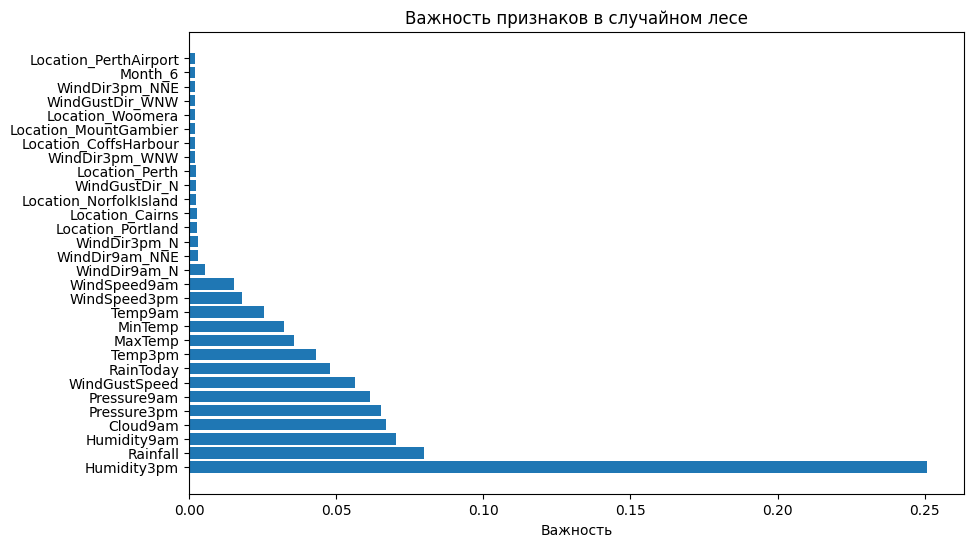

In [ ]:
#Задание 4.12
# Важность признаков
importances = rf_best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:30], feature_importance_df['Importance'][:30])
plt.xlabel('Важность признака')
plt.title('Важность признаков в случайном лесе')
plt.show()